Training sample size = 900
Using all features
Testing sample size = 50
Using all features
Validation sample size = 50
Using all features

Training DNN with  1000 data points and SGD lr=0.000010.

Train Epoch: 0 [0/900 (0%)]	Loss: 0.690383
Train Epoch: 0 [100/900 (11%)]	Loss: 0.650265
Train Epoch: 0 [200/900 (22%)]	Loss: 0.701628
Train Epoch: 0 [300/900 (33%)]	Loss: 0.702796
Train Epoch: 0 [400/900 (44%)]	Loss: 0.627193
Train Epoch: 0 [500/900 (56%)]	Loss: 0.703314
Train Epoch: 0 [600/900 (67%)]	Loss: 0.726081
Train Epoch: 0 [700/900 (78%)]	Loss: 0.699048
Train Epoch: 0 [800/900 (89%)]	Loss: 0.681299

Test set: Average loss: 0.06942662843658567, Accuracy: 56.00000000000001%

Train Epoch: 1 [0/900 (0%)]	Loss: 0.614313
Train Epoch: 1 [100/900 (11%)]	Loss: 0.700117
Train Epoch: 1 [200/900 (22%)]	Loss: 0.715495
Train Epoch: 1 [300/900 (33%)]	Loss: 0.716700
Train Epoch: 1 [400/900 (44%)]	Loss: 0.650614
Train Epoch: 1 [500/900 (56%)]	Loss: 0.694937
Train Epoch: 1 [600/900 (67%)]	Loss: 0.71899

C:\Users\pmcb1\AppData\Local\Temp\ipykernel_5200\368025010.py:334: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+x)
C:\Users\pmcb1\AppData\Local\Temp\ipykernel_5200\368025010.py:335: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+y)


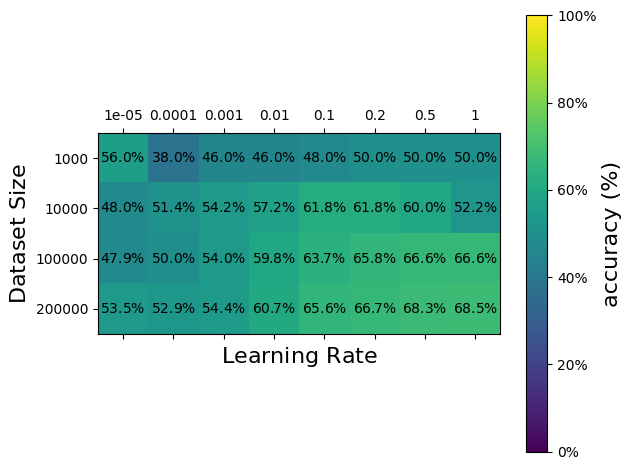

In [14]:
import os, sys
import pandas as pd
import numpy as np
import torch
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F # implements forward and backward definitions of an autograd operation
import torch.optim as optim # different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc
import matplotlib.pyplot as plt
import argparse # handles arguments
import sys; sys.argv=['']; del sys
import time

#definir a classe dos dados
class HIGGS(torch.utils.data.Dataset):
    def __init__ (self, data_size, train=None, high_feats=None, validation=True):
        features = ["HIGGS","lepton  pT", "lepton  eta", "lepton  phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta",
                     "jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]

        low_level_features = ["lepton  pT", "lepton  eta", "lepton  phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta",
                               "jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag"]
        
        high_level_features = ["m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]

        file = "HIGGS.csv"
        root = os.path.expanduser("~")+"\\Desktop\\Ciência de Dados\\"
        datapoints = pd.read_csv(root+file, header=None, nrows=data_size, engine="python")
        datapoints.columns = features
        X = datapoints[features[1:]]
        Y = datapoints["HIGGS"]

        if validation is True:
            training_size = int(0.9 * data_size) #90% para treino
            valid_size = int(0.05 * data_size)#5% para validação = treino

            if train is True:
                X = X[:training_size]
                Y = Y[:training_size]
                print("Training sample size = {}".format(training_size))
            elif train is None:
                X = X[training_size:training_size+valid_size]
                Y = Y[training_size:training_size+valid_size]
                print("Validation sample size = {}".format(valid_size))
            elif train is False:
                X = X[training_size+valid_size:]
                Y = Y[training_size+valid_size:]
                print("Testing sample size = {}".format(valid_size))


            #Já a pensar na dimensionality reduction, vou montar 3 situações: low+high feats, low feats only, high feats only
            if high_feats is None:
                self.data = (X.values.astype(np.float64), Y.values.astype(int))
                print("Using all features")
            elif high_feats is False:
                self.data = (X[low_level_features].values.astype(np.float64), Y.values.astype(int))
                print("Using low level features only")
            elif high_feats is True:
                self.data = (X[high_level_features].values.astype(np.float64), Y.values.astype(int))
                print("Using high level features only")

            self.train = train

        if validation is False:
            training_size = 1800000 #int(0.9 * data_size)
            test_size = 200000 

            if train is True:
                X = X[:training_size]
                Y = Y[:training_size]
                print("Training sample size = {}".format(training_size))
            elif train is False:
                X = X[-test_size:]
                Y = Y[-test_size:]
                print("Testing sample size = {}".format(test_size))

            if high_feats is None:
                self.data = (X.values.astype(np.float64), Y.values.astype(int))
                print("Using all features")
            elif high_feats is False:
                self.data = (X[low_level_features].values.astype(np.float64), Y.values.astype(int))
                print("Using low level features only")
            elif high_feats is True:
                self.data = (X[high_level_features].values.astype(np.float64), Y.values.astype(int))
                print("Using high level features only")

            self.train = train



    #Esta classe definida pelo torch requer que demos override a duas funções, uma que devolve o tamanho do conjunto de dados e outra que acede a cada valor (sample) deste conjunto
    def __len__ (self):
        return len(self.data[1]) #é o tamanho do Y (numero de linhas)
        
    def __getitem__ (self, i):
        features = torch.tensor(self.data[0][i], dtype=torch.float64)
        label = torch.tensor(self.data[1][i], dtype=torch.long)
        sample = (features, label)

        return sample

#A próxima função é responsável por "carregar" cada dataset (treino e test) para que estes sejam utilizados pela DNN
#Esta função aceita como argumento 
        
def loaders(args):
    if args.validation is True:
        train_loader = torch.utils.data.DataLoader(HIGGS(args.data_size, train=True, high_feats=args.high_feats, validation=args.validation), batch_size=args.batch_size, shuffle=True)#O "batch_size" é essencialmente número de eventos que são utilizados de cada vez num epoch (numero de updates em 1 epoch = training_size/batch_size)

        test_loader = torch.utils.data.DataLoader(HIGGS(args.data_size, train=False, high_feats=args.high_feats, validation=args.validation), batch_size=args.batch_size, shuffle=True)

        valid_loader = torch.utils.data.DataLoader(HIGGS(args.data_size, train=None, high_feats=args.high_feats, validation=args.validation), batch_size=args.batch_size, shuffle=True)

        return train_loader, test_loader, valid_loader
    elif args.validation is False:
        train_loader = torch.utils.data.DataLoader(HIGGS(args.data_size, train=True, high_feats=args.high_feats, validation=args.validation), batch_size=args.batch_size, shuffle=True)

        test_loader = torch.utils.data.DataLoader(HIGGS(args.data_size, train=False, high_feats=args.high_feats, validation=args.validation), batch_size=args.batch_size, shuffle=True)

        return train_loader, test_loader

#Uma vez procesados os dados, vamos definir a classe para o modelo de NN
class model(nn.Module):
    #Esta função define a composição da NN em termos das suas camadas e do tipo de operação (neste caso será linear) que aplica ao input
    def __init__ (self, high_feats=None):
        super(model, self).__init__() #Inicializamos a "super" para que o modelo adquira os atríbutos do "nn.Module"

        layers = [] #Camadas de neurónios da DNN
        #Aqui será interessante tentar ver a dependencia do número de neurónios
        if high_feats is None:         
            layers.append(nn.Linear(28,200).double()) #Neste caso usamos todas as features=28, então definimos a primeira camada como sendo composta por 28 neurónios (1 para cada variável de input) que processam o input como uma transformação linear do tipo y=wx+b e enviam o output para 200 neuronios
        elif high_feats is False:
            layers.append(nn.Linear(21,200).double()) #Só low level features
        elif high_feats is True:
            layers.append(nn.Linear(7,200).double()) #Só high level features

        
        layers.append(nn.Linear(200,100).double())
        layers.append(nn.Linear(100,2).double())        #Outra hipótese a investigar é a de um único neurónio de output pois apenas me importa qual a probabilidade de ser sinal (a prob de fundo = 1-prob_sinal)
        self.model_layers = nn.ModuleList(layers)
    
    #Esta função carateriza o funcionamente da NN, mais especificamente como esta passa os dados entre as suas camadas (exceto a última)
    def forward(self, x):
        for layer in self.model_layers[:-1]:
            x = F.relu(layer(x)) #relu -> Rectified linear unit activation function que devolve o valor 0 se o output da layer for negativo, ou devolve o seu valor caso o output seja positivo
            x = F.dropout(x, training=self.training)#Regularização através de "dropout" para prevenir "overfitting", definindo aleatóriamente alguns inputs como 0 durante o TREINO. Isto apenas acontece no treino e é garantido pela condição "training=self.training", pois "self.training = True" apenas quando a DNN está no modo ".train()"
        #Após passar pelas diversas camadas passamos o output pela última camada sem aplicar "ReLU" ou "dropout", sendo esta a camada que produz o output final do modelo
        x = self.model_layers[-1](x)
        x = F.softmax(x, dim=1)
        return x
        
#Uma vez definido o nosso modelo, passamos a construir a função que define o comportamento do modelo na fase de treino e de teste
def evaluate_model(args, train_loader, test_loader, valid_loader):
    #Primeiro inicializamos o modelo
    DNN = model(high_feats=args.high_feats) 

    #De seguida escolhemos a loss function (Cross-Entropy Loss)
    criteria = nn.CrossEntropyLoss()

    #Escolhemos também o otimizador (Stochastic Gradient Descent)
    optimizer = optim.SGD(DNN.parameters(), lr=args.lr, momentum=args.momentum)

    #Agora definimos a função de treino que toma como input "epoch", isto é o número de iterações que a DNN faz durante o treino 
    def train(epoch):#Os "epoch" são o número de vezes que o modelo percorre o "training set"
        DNN.train()#Começamos por colocar o modelo em modo de treino, o que seleciona "self.training=True" e ativa o "dropout" na "Forward Pass"
        for event, (data, label) in enumerate(train_loader):
            optimizer.zero_grad()#Restora os gradientes dos parametros a zero
            output = DNN(data)#Output proveniente do "Forward Pass" na forma de 2 valores entre 0 e 1 com soma igual a 1, cada um correpsondente à probabilidade do evento ser da classe correspondente ao seu índice na lista "output"
            #O output sai no formato de um ntuple de n = batch_size; se batch_size = 2 -> output = ([p1,p2],[p3,p4])
            loss = criteria(output, label)#Calcula a perda entre a previsão do modelo (output) e o valor real (label)
            loss.backward()#Realiza a backpropagation das perdas
            optimizer.step()#Atualiza os parametros com os gradientes computados
            #print("Esta é a forma do output: {}".format(output))

            #É do nosso interesse visualizar se o treino está a ser bem efetuado através da visualização da perda (o treino deve minimizar as perdas)
            if event % args.log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, event * len(data), len(train_loader.dataset),
                    100. * event / len(train_loader), loss.item()))
                
        return loss.item()
    
    #Definimos de seguida a função de teste, na qual vamos verificar o resultado do treino
    def test():
        DNN.eval()#Começamos por colocar o modelo em modo de teste, o que seleciona "self.training=False" e desativa o "dropout" na "Forward Pass"

        #Para quantificarmos o treino, convém calcularmos algumas propriedades do modelo, como a "accuracy" e a "average loss"
        test_loss = 0
        correct = 0
        
        #Guardamos aqui as probabilidades dos eventos serem sinal, na lista à qual o seu label real corresponde
        valid_signal = []
        valid_background = []

        test_signal = []
        test_background = []

        with torch.no_grad():#Utilizamos esta função para que o Pytorch não compute os gradientes pois não pretendemos atualizar os parametros do modelo durante a fase de teste
            for data, label in valid_loader:
                output = DNN(data)
                for i in range(len(label)):
                    if label[i] == 0:
                        valid_background.append(output[i,1].item())#Vamos apenas guardar a segunda probabilidade "indice = 1" (prob de ser sinal) para montar a test statistic
                    if label[i] == 1:
                        valid_signal.append(output[i,1].item())
            
            for data, label in test_loader:
                output = DNN(data)
                for i in range(len(label)):
                    if label[i] == 0:
                        test_background.append(output[i,1].item())#Vamos apenas guardar a segunda probabilidade "indice = 1" (prob de ser sinal) para montar a test statistic
                    if label[i] == 1:
                        test_signal.append(output[i,1].item())
                test_loss += criteria(output, label).item()#Soma da perda em cada evento
                prediction = output.argmax(dim=1, keepdim=True)#A previsão é igual ao índice do "output" correspondente ao maior valor, pois este é a probabilidade do evento ser dessa classe (0 ou 1)
                correct += prediction.eq(label.view_as(prediction)).sum().item()#Aqui a previsão é comparada com o "label" do evento e caso sejam iguais é adicionada uma contagem ao número de previsões corretas ("correct")
        
        average_loss = test_loss / len(test_loader.dataset)
        accuracy = correct / len(test_loader.dataset)
        
        #Print apenas por razões de visualização do corrido a correr
        print("\nTest set: Average loss: {}, Accuracy: {}%\n".format(average_loss, 100 * accuracy))
        
        return average_loss, accuracy, valid_signal, valid_background, test_signal, test_background
    
    def test_no_label():
        
        DNN.eval()

        test_probabilities = []

        with torch.no_grad():#Utilizamos esta função para que o Pytorch não compute os gradientes pois não pretendemos atualizar os parametros do modelo durante a fase de teste
            for data, label in test_loader:
                output = DNN(data)
                for i in range(len(output)):
                    test_probabilities.append(output[i,1].item())#Vamos apenas guardar a segunda probabilidade "indice = 1" (prob de ser sinal) para montar a test statistic
    
        return test_probabilities
    
    #Vamos agora criar 3 arrays para guardar as perdas durante o treino e teste e ainda a accuracy do teste
    train_loss = np.zeros((args.epochs,))
    test_loss = np.zeros_like(train_loss)
    test_accuracy = np.zeros_like(train_loss)

    #valid_signal = []
    #valid_background = []
    #test_signal = []
    #test_background = []

    st = time.time()#starting time
    elapsed_time = []#final time

    validation = args.validation
    #Vamos então fazer a iteração sobre cada epoch e guardar os valores das perdas e da accuracy nas respetivas listas
    if validation is True:
        for epoch in range(args.epochs):
            train_loss[epoch] = train(epoch)
            test_loss[epoch], test_accuracy[epoch], valid_signal, valid_background, test_signal, test_background = test()
            elapsed_time.append(time.time()-st)

        return test_loss, test_accuracy, elapsed_time, valid_signal, valid_background, test_signal, test_background
    
    elif validation is False:
        for epoch in range(args.epochs):
            train_loss[epoch] = train(epoch)
            test_probabilities = test_no_label()
            elapsed_time.append(time.time()-st)

        return test_probabilities

#Agora que definimos o treino e teste da DNN, vamos definir a otimização do nosso modelo onde vamos investigar o impacto de diversos parâmetros
def optim_datasize(args):
    data_sizes = [1000, 10000, 100000, 200000] #Estudo do impacto do data_size
    learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]#Estudo do impacto do learning_rate

    #Criamos listas para guardar a perda e a accuracy associada a cada data_size e learning_rate
    test_loss = np.zeros((len(data_sizes), len(learning_rates)), dtype=np.float64)
    test_accuracy = np.zeros_like(test_loss)

    #Agora realizamos a "grid_search" que itera sobre todos os eventos
    for i, data_size in enumerate(data_sizes):
        #Atualizamos os parâmetros das funções
        args.data_size = data_size
        args.batch_size = int(0.01*data_size)

        #Carregamos os dados de treino e teste
        train_loader, test_loader, valid_loader = loaders(args)

        for j, lr in enumerate(learning_rates):
            #Atualizar o learning_rate
            args.lr = lr

            #Print para sabermos o que estamos a fazer
            print("\nTraining DNN with %5d data points and SGD lr=%0.6f.\n"%(data_size,lr))

            #Agora fazemos o treino e teste do modelo e guardamos a perda e a accuracy da fase de teste
            x, y, q, w, e, r, t = evaluate_model(args, train_loader, test_loader, valid_loader)
            test_loss[i, j] = x[-1] #Loss após todos os epochs
            test_accuracy[i, j] = y[-1] #Accuracy após todos os epochs

    #print(test_loss)
    #print(test_loss_epoch[1])
    
    #Com esta informação montamos um gráfico da accuracy em função do learning_rate e do data_size
    plot_datasize(learning_rates, data_sizes, test_accuracy)


    #Seria possível realizar ainda mais plots para avaliar outras variavéis

#talvez tenha de trocar a ordem de x e y nesta função pq em cima quando chamo esta função eu troco o l_r de posição com data_size (no codigo original era plot(learning_rate, data_size, test_accuracy))
#eu fiz a troca e voltei ao estado original
def plot_datasize(x, y, test_accuracy):
    fontsize=16


    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    cax = ax.matshow(test_accuracy, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,.6,.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*test_accuracy[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{Learning\\ Rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{Dataset\\ Size}$',fontsize=fontsize)

    plt.tight_layout()

    #f2 = plt.figure(2)
    #ax2 = fig.add_subplot(111)
    #cax2 = ax2.matshow(test_accuracy, interpolation='nearest', vmin=0, vmax=1)


    plt.show()
         
def optim_lr(args):
    learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
  
    test_loss = []
    test_accuracy = []
    elapsed_time = []

    for j, lr in enumerate(learning_rates):
        args.lr = lr
        args.batch_size = int(0.01*args.data_size)

        train_loader, test_loader = loaders(args)
        print("\nTraining DNN with SGD lr=%0.6f.\n"%(lr))

        x , y , z = evaluate_model(args, train_loader, test_loader)
        test_loss.append(x)#len = epochs
        test_accuracy.append(y)#len = epochs
        elapsed_time.append(z)#len = epochs

    plot_lr(test_loss, learning_rates, test_accuracy, elapsed_time)

def plot_lr(loss, lr, accuracy, elapsed_time):
    #for i, y in enumerate(loss):
    #    epochs = [e for e in range(1, len(loss[i])+1)]
    #    plt.plot(epochs, y, label="Lr={}".format(lr[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Average Test Loss")
    #plt.title("Data size = {} and batch size = {}".format(args.data_size, int(0.01*args.data_size)))
    #plt.legend()
    #plt.show()

    #for i, y in enumerate(accuracy):
    #    epochs = [e for e in range(1, len(accuracy[i])+1)]
    #    plt.plot(epochs, y, label="Lr={}".format(lr[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Accuracy")
    #plt.title("Data size = {} and batch size = {}".format(args.data_size, int(0.01*args.data_size)))
    #plt.legend()
    #plt.show()

    for i, y in enumerate(elapsed_time):
        epochs = [e for e in range(1, len(elapsed_time[i])+1)]
        plt.plot(epochs, y, label="Lr={}".format(lr[i]))
    plt.xlabel("Epoch")
    plt.ylabel("Elapsed time")
    plt.title("Data size = {} and batch size = {}".format(args.data_size, int(0.01*args.data_size)))
    plt.legend()

    plt.show()

def optim_batch(args):
    batch_sizes = [0.1, 0.01, 0.001]

    test_loss = []
    test_accuracy = []
    elapsed_time = []

    for i, batch_size in enumerate(batch_sizes):
        args.batch_size = int(batch_size*args.data_size)

        train_loader, test_loader = loaders(args)
        print("\nTraining DNN with Batch_size=%0.6f.\n"%(int(batch_size*args.data_size)))

        x, y, z = evaluate_model(args, train_loader, test_loader)
        test_loss.append(x)
        test_accuracy.append(y)
        elapsed_time.append(z)
    
    plot_batch(test_loss, batch_sizes, test_accuracy, elapsed_time)

def plot_batch(loss, batches, accuracy, elapsed_time):
    #for i, y in enumerate(loss):
    #    epochs = [e for e in range(1, len(loss[i])+1)]
    #    plt.plot(epochs, y, label="Batch size={}".format(batches[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Average Test Loss")
    #plt.title("Data size = {} and learning rate = {}".format(args.data_size, args.lr))
    #plt.legend()
    #plt.show()

    #Para este gráfico retirei o batch_size=0.0001 pois pelo gráfico de cima vimos que tem uma grande perda
    #for i, y in enumerate(accuracy):
    #    epochs = [e for e in range(1, len(accuracy[i])+1)]
    #    plt.plot(epochs, y, label="Batch size={}".format(batches[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Accuracy")
    #plt.title("Data size = {} and learning rate = {}".format(args.data_size, args.lr))
    #plt.legend()
    #plt.show()

    for i, y in enumerate(elapsed_time):
        epochs = [e for e in range(1, len(elapsed_time[i])+1)]
        plt.plot(epochs, y, label="Batch size={}".format(batches[i]))
    plt.xlabel("Epoch")
    plt.ylabel("Elapsed time")
    plt.title("Data size = {} and learning rate = {}".format(args.data_size, args.lr))
    plt.legend()

    plt.show()

def optim_momentum(args):
    momenta = [ 0.2, 0.4, 0.6, 0.8, 1.0]

    test_loss = []
    test_accuracy = []
    elapsed_time = []

    for i, momentum in enumerate(momenta):
        args.batch_size = int(0.01*args.data_size)

        train_loader, test_loader = loaders(args)
        print("\nTraining DNN with Momentum=%0.6f.\n"%(momentum))

        x, y, z = evaluate_model(args, train_loader, test_loader)
        test_loss.append(x)
        test_accuracy.append(y)
        elapsed_time.append(z)

    plot_momentum(test_loss, momenta, test_accuracy, elapsed_time)

def plot_momentum(loss, momenta, accuracy, elapsed_time):
    #for i, y in enumerate(loss):
    #    epochs = [e for e in range(1, len(loss[i])+1)]
    #    plt.plot(epochs, y, label="Momentum={}".format(momenta[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Average Test Loss")
    #plt.title("Data size = {}, learning rate = {}, batch size = {}".format(args.data_size, args.lr, int(0.01*args.data_size)))
    #plt.legend()
    #plt.show()

    #for i, y in enumerate(accuracy):
    #    epochs = [e for e in range(1, len(accuracy[i])+1)]
    #    plt.plot(epochs, y, label="Momentum={}".format(momenta[i]))
    #plt.xlabel("Epoch")
    #plt.ylabel("Accuracy")
    #plt.title("Data size = {}, learning rate = {}, batch size = {}".format(args.data_size, args.lr, int(0.01*args.data_size)))
    #plt.legend()
    #plt.show()

    for i, y in enumerate(elapsed_time):
        epochs = [e for e in range(1, len(elapsed_time[i])+1)]
        plt.plot(epochs, y, label="Momentum={}".format(momenta[i]))
    plt.xlabel("Epoch")
    plt.ylabel("Elapsed time")
    plt.title("Data size = {}, learning rate = {}, batch size = {}".format(args.data_size, args.lr, int(0.01*args.data_size)))
    plt.legend()

    plt.show()

def optim_epoch(args):

    train_loader, test_loader, valid_loader = loaders(args)
    print("\nTraining DNN with Epoch=%0.6f.\n"%(args.epochs))

    test_loss, test_accuracy, elapsed_time = evaluate_model(args, train_loader, test_loader, valid_loader)

    plot_epoch(test_loss, args.epochs, test_accuracy, elapsed_time)

def plot_epoch(loss, epochs, accuracy, elapsed_time):
    
    #x = [e for e in range(1, len(loss)+1)]
    #plt.plot(x, loss, label="Data size={}, Lr={}, Batch size={}, Momentum={}".format(args.data_size, args.lr, int(0.01*args.data_size), args.momentum))
    #plt.xlabel("Epoch")
    #plt.ylabel("Average Test Loss")
    #plt.title("Epoch optimization")
    #plt.legend()
    #plt.show()

    #x = [e for e in range(1, len(accuracy)+1)]
    #plt.plot(x, accuracy, label="Data size={}, Lr={}, Batch size={}, Momentum={}".format(args.data_size, args.lr, int(0.01*args.data_size), args.momentum))
    #plt.xlabel("Epoch")
    #plt.ylabel("Accuracy")
    #plt.title("Epoch optimization")
    #plt.legend()
    #plt.show()

    x = [e for e in range(1, len(elapsed_time)+1)]
    plt.plot(x, elapsed_time, label="Data size={}, Lr={}, Batch size={}, Momentum={}".format(args.data_size, args.lr, int(0.01*args.data_size), args.momentum))
    plt.xlabel("Epoch")
    plt.ylabel("Elapsed time")
    plt.title("Epoch optimization")
    plt.legend()

    plt.show()

def validation(args):
    args.validation = True
    features = [True]#, False, None]

    signal_efficiency = []
    background_rejection = []
    significance = []

    for i in features:
        args.high_feats = i
        train_loader, test_loader, valid_loader = loaders(args)
        print("\nTraining DNN with dataset size = {}, batch size = {}, learning rate = {}, momentum = {} and epochs = {}.\n".format(args.data_size, args.batch_size, args.lr, args.momentum, args.epochs))
        
        test_loss, test_accuracy, elapsed_time, valid_signal, valid_background, test_signal, test_background = evaluate_model(args, train_loader, test_loader, valid_loader)

        bins = args.bins
        plot_validation(valid_signal, valid_background, test_signal, test_background, bins)

        #Com base nos histogramas da "test statistic" vamos aplicar um corte arbitrário em p=0.5 para fazer a validação
        #p = 0.5

        step = 1/bins

        p = np.arange(0, 1, step)

        s_efficiency = []
        b_rejection = []

        for i in p:

            #valid_signal_r = 0
            #valid_signal_l = 0
            #valid_background_r = 0
            #valid_background_l = 0

            test_signal_r = 0
            #test_signal_l = 0
            test_background_r = 0
            test_background_l = 0
            #for i in valid_signal:
            #    if i < p:
            #        valid_signal_l += 1
            #    if i > p:
            #        valid_signal_r += 1

            #for i in valid_background:
            #    if i < p:
            #        valid_background_l += 1
            #    if i > p:
            #        valid_background_r += 1

            for j in test_signal:
                #if j < p:
                #    test_signal_l += 1
                if j > i:
                    test_signal_r += 1

            for j in test_background:
                #if j < i:
                #    test_background_l += 1
                if j > i:
                    test_background_r += 1

            test_background_r = 326*test_background_r
            #test_background_l = 326*test_background_l
            #s_efficiency.append(test_signal_r/len(test_signal))
            #b_rejection.append(test_background_l/len(test_background))
            significance.append(test_signal_r/np.sqrt(test_signal_r+test_background_r))

        #signal_efficiency.append(s_efficiency)
        #background_rejection.append(b_rejection)

    print(significance)
    significance_max = significance.index(max(significance))
    print(significance_max)
    print("tamanho da significance list = {}".format(len(significance)))
    print("tamanho das probabilidades = {}".format(len(p)))
    best_cut = p[significance_max]
    print("\nThe cut that maximizes significance is p = {}\n".format(best_cut))

    plot_significance(significance, p)
    #plot_efficiency_rejection(s_efficiency, b_rejection)
    #plot_efficiency_rejection(signal_efficiency, background_rejection)


    #print("\nSinal à esquerda do corte no set de validação = {}\n".format(valid_signal_l))
    #print("\nSinal à direita do corte no set de validação = {}\n".format(valid_signal_r))
    #print("\nBackground à esquerda do corte no set de validação = {}\n".format(valid_background_l))
    #print("\nBackground à direita do corte no set de validação = {}\n".format(valid_background_r))

    #print("\nSinal à esquerda do corte no set de teste = {}\n".format(test_signal_l))
    #print("\nSinal à direita do corte no set de teste = {}\n".format(test_signal_r))
    #print("\nBackground à esquerda do corte no set de teste = {}\n".format(test_background_l))
    #print("\nBackground à direita do corte no set de teste = {}\n".format(test_background_r))

    #print("\nTotal à esquerda do corte no set de validação = {} +- {}\n".format(valid_signal_l+valid_background_l, int(np.sqrt(valid_signal_l+valid_background_l))))
    #print("\nTotal à direita do corte no set de validação = {} +- {}\n".format(valid_signal_r+valid_background_r, int(np.sqrt(valid_signal_r+valid_background_r))))
    #print("\nTotal à esquerda do corte no set de teste = {} +- {}\n".format(test_signal_l+test_background_l, int(np.sqrt(test_signal_l+test_background_l))))
    #print("\nTotal à direita do corte no set de teste = {} +- {}\n".format(test_signal_r+test_background_r, int(np.sqrt(test_signal_r+test_background_r))))

def plot_validation(valid_signal, valid_background, test_signal, test_background, bins):
    
    plt.hist(valid_signal, bins, alpha = 0.5, label = "Signal")
    plt.hist(valid_background, bins, alpha = 0.5, label = "Background")
    plt.xlabel("Probability of signal")
    plt.ylabel("Number of events")
    plt.title("Validation set")
    plt.legend(loc = "upper right")
    plt.show()

    plt.hist(test_signal, bins, alpha = 0.5, label = "Signal")
    plt.hist(test_background, bins, alpha = 0.5, label = "Background")
    plt.xlabel("Probability of signal")
    plt.ylabel("Number of events")
    plt.title("Testing set")
    plt.legend(loc = "upper right")
    plt.show()

def plot_efficiency_rejection(signal_efficiency, background_rejection):

    #plt.plot(signal_efficiency, background_rejection, label = "High features only")

    plt.plot(signal_efficiency[0], background_rejection[0], label = "High features only")
    plt.plot(signal_efficiency[1], background_rejection[1], label = "Low features only")
    plt.plot(signal_efficiency[2], background_rejection[2], label = "All features")

    auc_high = np.trapz(background_rejection[0], signal_efficiency[0])
    auc_low = np.trapz(background_rejection[1], signal_efficiency[1])
    auc_all = np.trapz(background_rejection[2], signal_efficiency[2])

    print("\nAUC for high features = {}\n".format(auc_high))
    print("\nAUC for low features = {}\n".format(auc_low))
    print("\nAUC for all features = {}\n".format(auc_all))

    plt.xlabel("Signal efficiency")
    plt.ylabel("Background rejection")
    plt.legend()
    plt.show()

def plot_significance(significance, p):
    plt.plot(p, significance)
    plt.xlabel("Probability of signal")
    plt.ylabel("Significance")
    plt.show()

def testing(args):
    args.validation = False
    
    train_loader, test_loader = loaders(args)
    print("\nTraining DNN with dataset size = {}, batch size = {}, learning rate = {}, momentum = {} and epochs = {}.\n".format(args.data_size, args.batch_size, args.lr, args.momentum, args.epochs))

    test_probabilities = evaluate_model(args, train_loader, test_loader, 0)

    plot_testing(test_probabilities,args.bins)

    p = args.cut 
    
    signal_r = []

    for j in test_probabilities:
        if j > p:
            signal_r.append(j)

    print("\nNumber of signal events = {}\n".format(len(signal_r)))

    plot_signal(test_probabilities, signal_r, args.bins)

def plot_testing(test_probabilities, bins):
    
    #bins = int(np.sqrt(len(test_probabilities)))

    plt.hist(test_probabilities, bins, alpha = 0.5)
    #plt.vlines(x=0.88,y)
    plt.xlabel("Probability of signal")
    plt.ylabel("Number of events")
    plt.title("Unlabeled data")
    #plt.legend(loc = "upper right")
    plt.show()

def plot_signal(test_probabilities, signal_r, bins):

    bins_signal = int(np.sqrt(len(signal_r)))

    plt.hist(test_probabilities, bins, alpha = 0.5, label = "Unlabeled data")
    plt.hist(signal_r, bins_signal, alpha = 0.5, label = "Predicted Signal")
    plt.xlabel("Probability of signal")
    plt.ylabel("Number of events")
    plt.title("Signal prediction from unlabeled data")
    plt.legend(loc = "upper right")
    plt.show()



#Agora só nos resta definir os argumentos (args)
parser = argparse.ArgumentParser(description='PyTorch HIGGS Example')
parser.add_argument('--data_size', type=int, default=2000000, metavar='DS',
                help='size of data set (default: 100000)')
parser.add_argument('--high_feats', type=bool, default=True, metavar='HLF',         #True
                help='toggles high level features (default: None)')
parser.add_argument('--batch-size', type=int, default=int(0.01*2000000), metavar='N',
                help='input batch size for training (default: 64)')
parser.add_argument('--epochs', type=int, default=30, metavar='N',                   #30
                help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.1, metavar='LR',
                help='learning rate (default: 0.02)')
parser.add_argument('--momentum', type=float, default=0.8, metavar='M',
                help='SGD momentum (default: 0.5)')
parser.add_argument('--seed', type=int, default=22, metavar='S',
                help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                help='how many batches to wait before logging training status')
parser.add_argument('--validation', type=bool, default=True, metavar='HLF',
                help='i change this value in the functions just to be sure')
parser.add_argument('--bins', type=int, default=int(np.sqrt(0.01*2000000)), metavar='HLF',
                help='sqrt data set size')
parser.add_argument('--cut', type=float, default=0.88, metavar='HLF',
                help='cut that maximized significance in testing')
args = parser.parse_args()

# set seed of random number generator
np.random.seed(args.seed)
torch.manual_seed(args.seed)

#Otimização dos hyper-parametros:

optim_datasize(args)
#optim_lr(args)
#optim_batch(args)
#optim_momentum(args)
#optim_epoch(args)


#Validação do modelo
#validation(args)

#Teste de dados sem label
#testing(args)



